In [12]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
	classification_report,
	confusion_matrix,
	roc_auc_score,
	roc_curve,
	precision_recall_curve,
	f1_score,
	precision_score,
	recall_score,
	accuracy_score,
)

warnings.filterwarnings("ignore")

In [2]:
seed = 42
np.random.seed(seed)

#### Loading the data

In [3]:
X_train = np.load("artifacts/X_train.npz")["arr_0"]
Y_train = np.load("artifacts/y_train.npz")["arr_0"]
X_test = np.load("artifacts/X_test.npz")["arr_0"]
Y_test = np.load("artifacts/y_test.npz")["arr_0"]

#### Model Training

In [4]:
model_lr = LogisticRegression(
	random_state=42,
	max_iter=1000,
)

model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Inference

In [8]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [9]:
Y_hat_train

array([0, 0, 0, ..., 1, 1, 0], shape=(12668,))

In [10]:
Y_proba_train

array([[0.83201964, 0.16798036],
       [0.91486415, 0.08513585],
       [0.74766146, 0.25233854],
       ...,
       [0.46479775, 0.53520225],
       [0.36867483, 0.63132517],
       [0.7050599 , 0.2949401 ]], shape=(12668, 2))

#### Evaluation

In [13]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [15]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.6948474237118559
Precision: 0.33884297520661155
Recall: 0.6542553191489362
F1 Score: 0.44646098003629764


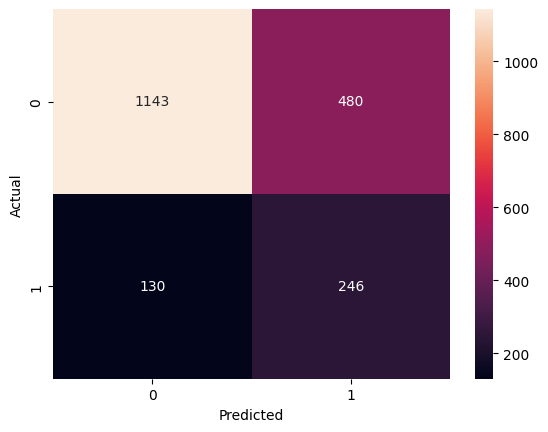

In [17]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()